In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import random as rn
from IPython.display import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
from matplotlib import pyplot as plt
from PIL import Image

import json

%matplotlib inline

In [ ]:
dir_path = "/content/drive/MyDrive/딥러닝 팀플/data/일부 데이터/Training/01.원천데이터"
json_path = "/content/drive/MyDrive/딥러닝 팀플/data/일부 데이터/Training/02.라벨링데이터"

In [ ]:
filenames = os.listdir(dir_path)
categories = os.listdir(dir_path)
num_classes = len(categories)

In [ ]:
image_paths = []
labels = []

In [ ]:
for subdir in os.listdir(dir_path):
  #if subdir[3:] in people50: 만약 이거 넣으면 170명안에서만 함
    subdir_path = os.path.join(dir_path, subdir)
    if os.path.isdir(subdir_path):
        # 각 서브폴더에 대해 이미지 파일 순회
        for image_file in os.listdir(subdir_path):
            if image_file.endswith('.png'):
                # 라벨 파일 경로 구성
                current_json_path = os.path.join(json_path, 'TL' +subdir[2:], os.path.splitext(image_file)[0] + '.json')
                # 라벨 파일이 존재하는 경우만 처리
                if os.path.exists(current_json_path):
                    # 이미지 경로 추가
                    image_paths.append(os.path.join(subdir_path, image_file))
                    # 라벨 데이터 로드
                    with open(current_json_path, 'r') as f:
                        label_data = json.load(f)
                        labels.append(label_data)

In [ ]:
def corr(annotation):
    if 'box' in annotation:
        box_info = annotation['box']
        x = box_info.get('x', None)
        y = box_info.get('y', None)
        w = box_info.get('w', None)
        h = box_info.get('h', None)

        if x is not None and y is not None and w is not None and h is not None:
            return x, y, w, h

    # If 'box' is not present or any of the values is missing, return None
    return None

# 예시 사용
first_annotation = labels[0]['annotation'][0]
xywh = corr(first_annotation)

# 결과 출력
print("xywh:", xywh)


xywh: (58.13286562848987, 134.55653744199378, 354.416862622868, 370.2751312347833)


In [ ]:
def uder10mb_image(image_path, max_size_mb=10, new_size=(200, 200)):
    # Check the file size
    file_size_mb = os.path.getsize(image_path) / (1024 * 1024)  # Convert to megabytes
    if file_size_mb > max_size_mb:
        #print(f"Ignoring {image_path} due to its size ({file_size_mb:.2f} MB)")
        return

    # Read the image using OpenCV
    img = cv2.imread(image_path)
    # Convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [ ]:
image_paths

['/content/drive/MyDrive/딥러닝 팀플/data/일부 데이터/Training/01.원천데이터/TS_0224/0224_1984_24_00000023_D.png',
 '/content/drive/MyDrive/딥러닝 팀플/data/일부 데이터/Training/01.원천데이터/TS_0224/0224_1984_07_00000005_F.png',
 '/content/drive/MyDrive/딥러닝 팀플/data/일부 데이터/Training/01.원천데이터/TS_0224/0224_1984_12_00000010_F.png',
 '/content/drive/MyDrive/딥러닝 팀플/data/일부 데이터/Training/01.원천데이터/TS_0224/0224_1984_01_00000002_F.png',
 '/content/drive/MyDrive/딥러닝 팀플/data/일부 데이터/Training/01.원천데이터/TS_0224/0224_1984_01_00000001_F.png',
 '/content/drive/MyDrive/딥러닝 팀플/data/일부 데이터/Training/01.원천데이터/TS_0224/0224_1984_32_00000035_D.png',
 '/content/drive/MyDrive/딥러닝 팀플/data/일부 데이터/Training/01.원천데이터/TS_0224/0224_1984_30_00000031_D.png',
 '/content/drive/MyDrive/딥러닝 팀플/data/일부 데이터/Training/01.원천데이터/TS_0224/0224_1984_30_00000032_D.png',
 '/content/drive/MyDrive/딥러닝 팀플/data/일부 데이터/Training/01.원천데이터/TS_0224/0224_1984_34_00000039_D.png',
 '/content/drive/MyDrive/딥러닝 팀플/data/일부 데이터/Training/01.원천데이터/TS_0224/0224_1984_24_00000024_D.png',


In [ ]:
original_img = []
zoom_img = []
Y_index = []
for idex, image_dir in enumerate(image_paths):
  if not image_dir.endswith('png'):
    continue
  img = uder10mb_image(image_dir)  # 10mb이하 이미지 읽기
  if img is None:
    continue
  xywh = corr(labels[idex]['annotation'][0])

  # xywh에서 x, y, w, h 추출
  x, y, w, h = xywh

  # 이미지 슬라이싱 범위 계산
  x_start = int(x)
  x_end = int(x + w)
  y_start = int(y)
  y_end = int(y + h)

  # 이미지 슬라이싱
  cropped_img = img[y_start:y_end, x_start:x_end, :]

  img = cv2.resize(img, (64, 64), interpolation=cv2.INTER_NEAREST)
  img2 = cv2.resize(cropped_img, (64, 64), interpolation=cv2.INTER_NEAREST)

  original_img.append(img)
  zoom_img.append(img2)
  Y_index.append(idex)

In [ ]:
def ages(age_past):
    age = [0] * 3
    index = age_past // 10
    if index < 2:
      age[0] = 1
    if 2 <= index < 4:
      age[1] = 1
    if index >= 4:
      age[2] = 1
    return age

label = ages(labels[1]['age_past'])
label

[1, 0, 0]

In [ ]:
Y = []
for index, json in enumerate(labels):
  if index in Y_index:
    label = ages(json['age_past'])
    Y.append(label)  # 정답 레이블 리스트에 추가

In [ ]:
X0=zoom_img
len(X0)

1416

In [ ]:
Y0 = Y
len(Y0)

1416

In [ ]:
X = np.array(X0)
Y = np.array(Y0)

print("Shape of X:", X.shape) # 샘플수, 높이, 너비, 채널
print("Shape of Y:", Y.shape)

Shape of X: (1416, 64, 64, 3)
Shape of Y: (1416, 3)


In [ ]:
# 학습 데이터와 테스트 데이터 분리
X_train0, X_test, Y_train0, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y) # stratify는 클래스의 비율을 맞춰서 추출

In [ ]:
len(X_train0)

1132

In [ ]:
len(Y_train0)

1132

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from google.colab.patches import cv2_imshow


# 데이터 증강을 위한 ImageDataGenerator 생성
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],
    channel_shift_range=50
)


In [ ]:
# 데이터 증강 수행 및 결과 이미지 저장
X_train_augmented_images1 = []
for img in X_train0:
    # 이미지를 4D 텐서로 변환 (너비, 높이, 채널)
    img = np.expand_dims(img, axis=0)

    # 데이터 증강 수행
    for batch in datagen.flow(img, batch_size=1):
        augmented_image = batch[0].astype('uint8')
        #augmented_images.append(cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))
        augmented_image2 = cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB)
        X_train_augmented_images1.append(augmented_image2)
        break  # 하나의 이미지에 대해서만 수행


In [ ]:
# 데이터 증강 수행 및 결과 이미지 저장
X_train_augmented_images2 = []
for img in X_train0:
    # 이미지를 4D 텐서로 변환 (너비, 높이, 채널)
    img = np.expand_dims(img, axis=0)

    # 데이터 증강 수행
    for batch in datagen.flow(img, batch_size=1):
        augmented_image = batch[0].astype('uint8')
        #augmented_images.append(cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))
        augmented_image2 = cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB)
        X_train_augmented_images2.append(augmented_image2)
        break  # 하나의 이미지에 대해서만 수행


In [ ]:
# 데이터 증강 수행 및 결과 이미지 저장
X_train_augmented_images3 = []
for img in X_train0:
    # 이미지를 4D 텐서로 변환 (너비, 높이, 채널)
    img = np.expand_dims(img, axis=0)

    # 데이터 증강 수행
    for batch in datagen.flow(img, batch_size=1):
        augmented_image = batch[0].astype('uint8')
        #augmented_images.append(cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))
        augmented_image2 = cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB)
        X_train_augmented_images3.append(augmented_image2)
        break  # 하나의 이미지에 대해서만 수행


In [ ]:
X_train_augmented_images1_2=[]
for i in range(len(X_train_augmented_images1)):
    X_train_augmented_images1_2.append(cv2.cvtColor(X_train_augmented_images1[i], cv2.COLOR_BGR2RGB))
    #plt.imshow(cv2.cvtColor(augmented_images[i], cv2.COLOR_BGR2RGB))

In [ ]:
X_train_augmented_images2_2=[]
for i in range(len(X_train_augmented_images2)):
    X_train_augmented_images2_2.append(cv2.cvtColor(X_train_augmented_images2[i], cv2.COLOR_BGR2RGB))
    #plt.imshow(cv2.cvtColor(augmented_images[i], cv2.COLOR_BGR2RGB))

In [ ]:
X_train_augmented_images3_2=[]
for i in range(len(X_train_augmented_images3)):
    X_train_augmented_images3_2.append(cv2.cvtColor(X_train_augmented_images3[i], cv2.COLOR_BGR2RGB))
    #plt.imshow(cv2.cvtColor(augmented_images[i], cv2.COLOR_BGR2RGB))

In [ ]:
print(len(X_train_augmented_images1_2))
print(len(X_train_augmented_images2_2))
print(len(X_train_augmented_images3_2))

1132
1132
1132


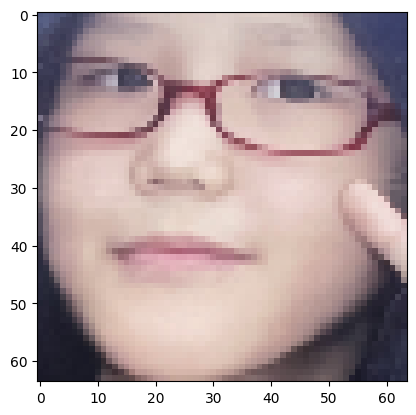

In [ ]:
plt.imshow(X_train0[1])

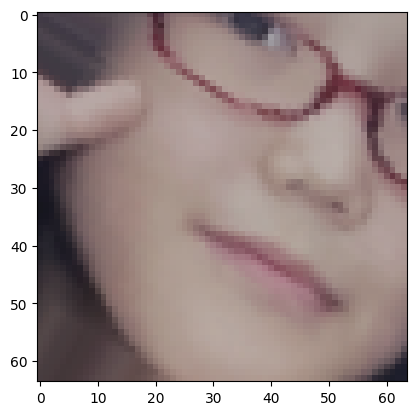

In [ ]:
plt.imshow(X_train_augmented_images1_2[1])

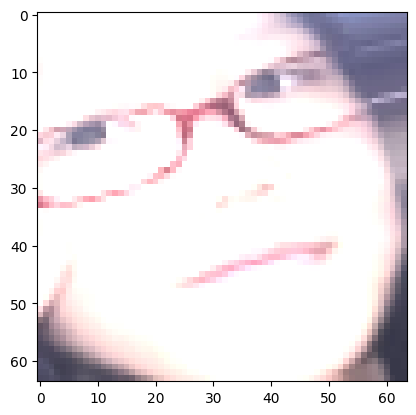

In [ ]:
plt.imshow(X_train_augmented_images2_2[1])

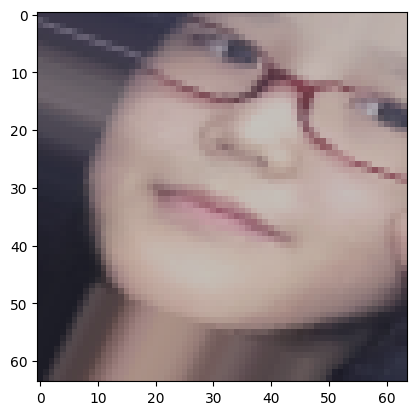

In [ ]:
plt.imshow(X_train_augmented_images3_2[1])

In [ ]:
Y_train0[1]

array([1, 0, 0])

In [ ]:
type(X_train_augmented_images2)

list

In [ ]:
type(X_train0)

numpy.ndarray

In [ ]:
X_train_list = list(X_train0) + X_train_augmented_images1_2 + X_train_augmented_images2_2 + X_train_augmented_images3_2
Y_train_list = list(Y_train0)*4

In [ ]:
print(len(X_train_list))
print(len(Y_train_list))

4528
4528


In [ ]:
X_train = np.array(X_train_list)
Y_train = np.array(Y_train_list)

In [ ]:
print("X_train:", X_train.shape[0], "training images,", "height:", X_train.shape[1], ", width:", X_train.shape[2], ", channel:", X_train.shape[3])
print("X_test:", X_test.shape[0], "test images,", "height:", X_test.shape[1], ", width:", X_test.shape[2], ", channel:", X_test.shape[3])
print("Y_train:", Y_train.shape[0], "training images,", Y_train.shape[1], "classes")
print("Y_test:", Y_test.shape[0], "test images,", Y_test.shape[1], "classes")

X_train: 4528 training images, height: 64 , width: 64 , channel: 3
X_test: 284 test images, height: 64 , width: 64 , channel: 3
Y_train: 4528 training images, 3 classes
Y_test: 284 test images, 3 classes


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, stratify=Y_train, test_size=0.2)

In [ ]:
# 파일로 저장
np.save('X_train_data_with_aug_64.npy', X_train)
np.save('Y_train_data_with_aug_64', Y_train)
np.save('X_test_data_with_aug_64.npy', X_test)
np.save('Y_test_data_with_aug_64.npy', Y_test)
np.save('X_val_data_with_aug_64.npy', X_val)
np.save('Y_val_data_with_aug_64.npy', Y_val)